<a href="https://colab.research.google.com/github/A24bhi/Image-Classification-Using-CNN/blob/main/Image_Classification_Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import zipfile

zip_path = "/content/drive/MyDrive/test_set.zip"
extract_path = "/content/test_set"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction complete. Files are inside:", extract_path)

Extraction complete. Files are inside: /content/test_set


In [6]:
input_dir = "/content/test_set/test_set"

In [74]:
import os

print("Contents of input_dir:", os.listdir(input_dir))

Contents of input_dir: ['cats', 'dogs']


In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping


In [20]:
import os
import cv2
import numpy as np

data_path = "/content/test_set/test_set"  # Update this path
categories = ["cats", "dogs"]
image_size = (128, 128)  # Resize images to 128x128
valid_extensions = (".jpg", ".jpeg", ".png", ".bmp")  # Define valid image extensions

X, y = [], []

for category in categories:
    label = categories.index(category)  # Convert label to numerical
    folder = os.path.join(data_path, category)

    if not os.path.exists(folder):
        print(f"Warning: Directory {folder} does not exist.")
        continue

    for img_name in os.listdir(folder):
        if not img_name.lower().endswith(valid_extensions):  # Skip non-image files
            print(f"Skipping non-image file: {img_name}")
            continue

        img_path = os.path.join(folder, img_name)

        img = cv2.imread(img_path)
        if img is None:
            print(f"Skipping invalid image: {img_path}")
            continue

        img = cv2.resize(img, image_size)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB

        X.append(img)
        y.append(label)

X = np.array(X) / 255.0  # Normalize to [0,1]
y = np.array(y)

print(f"Dataset Shape: {X.shape}, Labels Shape: {y.shape}")


Skipping non-image file: _DS_Store
Skipping non-image file: _DS_Store
Dataset Shape: (2023, 128, 128, 3), Labels Shape: (2023,)


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
print(f"Training set: {X_train.shape}, Labels: {y_train.shape}")
print(f"Testing set: {X_test.shape}, Labels: {y_test.shape}")


Training set: (1618, 128, 128, 3), Labels: (1618,)
Testing set: (405, 128, 128, 3), Labels: (405,)


In [84]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

datagen.fit(X_train)


In [85]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(256, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [87]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, verbose=1)

history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_test, y_test),
    epochs=50,
    callbacks=[early_stopping, lr_scheduler]
)


Epoch 1/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.6333 - loss: 0.7193 - val_accuracy: 0.5160 - val_loss: 1.3397 - learning_rate: 0.0010
Epoch 2/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.6606 - loss: 0.6412 - val_accuracy: 0.5160 - val_loss: 1.2292 - learning_rate: 0.0010
Epoch 3/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - accuracy: 0.6699 - loss: 0.6237 - val_accuracy: 0.5160 - val_loss: 1.6748 - learning_rate: 0.0010
Epoch 4/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.6944 - loss: 0.5784 - val_accuracy: 0.5235 - val_loss: 0.9222 - learning_rate: 0.0010
Epoch 5/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.6937 - loss: 0.5538 - val_accuracy: 0.5160 - val_loss: 0.9511 - learning_rate: 0.0010
Epoch 6/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6971 - loss: 0.5461
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
51/51 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - accuracy: 0.6971 - loss: 0.5464 - val_accuracy: 

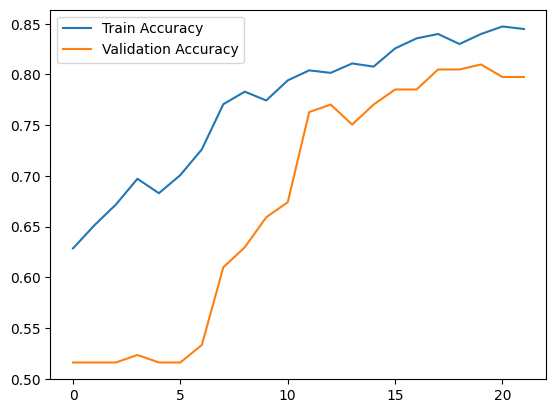

In [153]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


In [118]:
import os
print(os.listdir('/content'))

['.config', 'drive', 'test_set', 'sample_data']


In [119]:
model.save('/content/my_model.keras')


In [120]:
import os
print(os.listdir('/content'))


['.config', 'drive', 'test_set', 'my_model.keras', 'sample_data']


In [121]:
model.save('/content/my_model.h5')
